# Representation
converts the words to numerical vectors

### One-hot Encoding (Dummy Encoding)
Converts categories into multiple binary columns where only one bit is active (1) per entry.

PROS: numerical categorical data,eliminating ordinality (like year 1, 2, 3 ,4 don't provide order information)

CONS: higher dimension, sparse observation for some dimensions, overfitting when too many categories

In [7]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
data = {
    'Employee id': [10, 20, 15, 25, 30],
    'Gender': ['M', 'F', 'F', 'M', 'F'],
    'Remarks': ['Good', 'Nice', 'Good', 'Great', 'Nice']
}

df = pd.DataFrame(data)
print(f"Original Data:\n{df}\n")
# Use pd.get_dummies() to one-hot encode the categorical columns
df_pandas_encoded = pd.get_dummies(df, columns=['Gender', 'Remarks'], drop_first=True)
print(f"One-Hot Encoded Data using Pandas:\n{df_pandas_encoded}\n")

encoder = OneHotEncoder(sparse_output=False)
categorical_columns = ['Gender', 'Remarks']
one_hot_encoded = encoder.fit_transform(df[categorical_columns])
one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(categorical_columns))

df_sklearn_encoded = pd.concat([df.drop(categorical_columns, axis=1), one_hot_df], axis=1)

print(f"One-Hot Encoded Data using Scikit-Learn:\n{df_sklearn_encoded}\n")


Original Data:
   Employee id Gender Remarks
0           10      M    Good
1           20      F    Nice
2           15      F    Good
3           25      M   Great
4           30      F    Nice

One-Hot Encoded Data using Pandas:
   Employee id  Gender_M  Remarks_Great  Remarks_Nice
0           10      True          False         False
1           20     False          False          True
2           15     False          False         False
3           25      True           True         False
4           30     False          False          True

One-Hot Encoded Data using Scikit-Learn:
   Employee id  Gender_F  Gender_M  Remarks_Good  Remarks_Great  Remarks_Nice
0           10       0.0       1.0           1.0            0.0           0.0
1           20       1.0       0.0           0.0            0.0           1.0
2           15       1.0       0.0           1.0            0.0           0.0
3           25       0.0       1.0           0.0            1.0           0.0
4           3

### Bag of Words

step1 : preprocessing the text into list of words

step2 : summarize the frequency of each words and select most frequent n words

step2 : set binary vector, where the frequent word positions are 1 otherwise 0

In [1]:
## read the text file
with open('de-en.txt', 'r') as file:
    lines = file.readlines()

In [5]:
import nltk 
import re 
import numpy as np 
  
## preprocessing 
dataset = nltk.sent_tokenize(''.join(lines))
for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()  # Convert to lowercase
    dataset[i] = re.sub(r'\W', ' ', dataset[i])  # Remove non-word characters
    dataset[i] = re.sub(r'\s+', ' ', dataset[i]).strip()  # Remove extra spaces

# Output cleaned sentences
print(dataset[:10]) 

['wiederaufnahme der sitzungsperiode ich erkläre die am freitag dem 17', 'dezember unterbrochene sitzungsperiode des europäischen parlaments für wiederaufgenommen wünsche ihnen nochmals alles gute zum jahreswechsel und hoffe daß sie schöne ferien hatten', 'wie sie feststellen konnten ist der gefürchtete millenium bug nicht eingetreten', 'doch sind bürger einiger unserer mitgliedstaaten opfer von schrecklichen naturkatastrophen geworden', 'im parlament besteht der wunsch nach einer aussprache im verlauf dieser sitzungsperiode in den nächsten tagen', 'heute möchte ich sie bitten das ist auch der wunsch einiger kolleginnen und kollegen allen opfern der stürme insbesondere in den verschiedenen ländern der europäischen union in einer schweigeminute zu gedenken', 'ich bitte sie sich zu einer schweigeminute zu erheben', 'das parlament erhebt sich zu einer schweigeminute', 'frau präsidentin zur geschäftsordnung', 'wie sie sicher aus der presse und dem fernsehen wissen gab es in sri lanka mehre

In [7]:
## frequency
word2count = {} 
for data in dataset: 
    words = nltk.word_tokenize(data) 
    for word in words: 
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1

In [15]:
## results
import heapq 
freq_words = heapq.nlargest(200, word2count, key=word2count.get)
BoW = [] 
for data in dataset[:500]: 
    vector = [] 
    for word in freq_words: 
        if word in nltk.word_tokenize(data): 
            vector.append(1) 
        else: 
            vector.append(0) 
    BoW.append(vector) 
BoW = np.asarray(BoW) 

In [21]:
dataset[:3]

['wiederaufnahme der sitzungsperiode ich erkläre die am freitag dem 17',
 'dezember unterbrochene sitzungsperiode des europäischen parlaments für wiederaufgenommen wünsche ihnen nochmals alles gute zum jahreswechsel und hoffe daß sie schöne ferien hatten',
 'wie sie feststellen konnten ist der gefürchtete millenium bug nicht eingetreten']

In [23]:
BoW[:3]

array([[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 

## N-gram
Contiguous sequence of n items(characters,words,sub-words) from a given sample of text or speech, an N-gram language model predicts the probability of a given N-gram within any sequence of words. i.e. the possibility of 'python' being next term if given previous sequence as ['Natural', 'language','prcessing','in']

P(w_n|w_1,w_2,w_3,...,w_{i-1}) = \frac{w_1,w_2,w_3,...,w_i}{P(w_1,w_2,w_3,...,w_{i-1})}

\approx \frac{w_1,w_2,w_3,...,w_n}{P(w_{i-n},w_{i-n+1},...,w_{n-1})}

In [26]:
import nltk
from nltk import bigrams, trigrams
from nltk.corpus import reuters
from collections import defaultdict

In [38]:
# Join the lines into a single string
text = ' '.join(lines)
# Tokenize the text
words = nltk.word_tokenize(text)
# Create trigrams
tri_grams = list(trigrams(words))

# Build a trigram model
model = defaultdict(lambda: defaultdict(lambda: 0))
# Count frequency of co-occurrence
for w1, w2, w3 in tri_grams:
    model[(w1, w2)][w3] += 1

# Transform the counts into probabilities
for w1_w2 in model:
    total_count = float(sum(model[w1_w2].values()))
    for w3 in model[w1_w2]:
        model[w1_w2][w3] /= total_count

# Function to predict the next word
def predict_next_word(w1, w2):
    next_word = model[w1, w2]
    if next_word:
        predicted_word = max(next_word, key=next_word.get)  # Choose the most likely next word
        return predicted_word
    else:
        return "No prediction available"

# Example usage
print("Next Word:", predict_next_word('Hund', 'läuft'))


Next Word: No prediction available


In [36]:
print("Next Word:", predict_next_word('not', 'my'))

Next Word: heart


In [ ]:
print("Next Word:", predict_next_word('not', 'my'))

In [41]:
lines[-1]

'(Die Sitzung wird um 10.50 Uhr geschlossen.)\n'

### TF-IDF (Term Frequency-Inverse Document Frequency)
evaluate the importance of a word in a document relative to a collection of documents

Term Frequency = numbers of term t appearing in document d/total terms in document d

Inverse Document Frequency = log(total number of documents/number of documents containing term t)

Common but irrelavent word such as 'in' and 'out' could have high TF, yet IDF alone can't reflect the importance of document specified terms (i.e. keyword in papers). TF-IDF balances common and rare words to highlight the most meaningful terms.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# assign documents
d0 = 'Apples are fruits'
d1 = 'Tomatoes are fruits'
d2 = 'Tomatoes are also vegetables'

# merge documents into a single corpus
string = [d0, d1, d2]

# get tf-df values
tfidf = TfidfVectorizer()
result = tfidf.fit_transform(string)

the words 'apple','also' are highlighted because they only appear in one documents, and 'tomamtoes','fruits' are considered important because they are frequent yet not common

In [50]:
print('\nidf values:')
for word, idf_value in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(word, ':', idf_value)


idf values:
also : 1.6931471805599454
apples : 1.6931471805599454
are : 1.0
fruits : 1.2876820724517808
tomatoes : 1.2876820724517808
vegetables : 1.6931471805599454


form of output in tf-idf values: (ith document, jth word) tf-idf

In [52]:
# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)

# display tf-idf values
print('\ntf-idf value:')
print(result)

# in matrix form
print('\ntf-idf values in matrix form:')
print(result.toarray())


Word indexes:
{'apples': 1, 'are': 2, 'fruits': 3, 'tomatoes': 4, 'also': 0, 'vegetables': 5}

tf-idf value:
  (0, 3)	0.5478321549274363
  (0, 2)	0.4254405389711991
  (0, 1)	0.7203334490549893
  (1, 4)	0.6198053799406072
  (1, 3)	0.6198053799406072
  (1, 2)	0.48133416873660545
  (2, 5)	0.5844829010200651
  (2, 0)	0.5844829010200651
  (2, 4)	0.444514311537431
  (2, 2)	0.34520501686496574

tf-idf values in matrix form:
[[0.         0.72033345 0.42544054 0.54783215 0.         0.        ]
 [0.         0.         0.48133417 0.61980538 0.61980538 0.        ]
 [0.5844829  0.         0.34520502 0.         0.44451431 0.5844829 ]]


# Embedding : trained representation models

### Word2Vec
trained through skip-gram or CBOW(continuous bag of words), a shallow network with 2 hidden layers. 'The dog is running'

Skip-gram : predict the context with target words 'dog'>>'the''is''running'

CBOW : predict target words with given window of context 'the' 'is' 'runing' >> 'dog'

PROS : semantic representation, distributional pattern reflects semantic similarities, allows vector arithmetic

Application : machine translation, text classification, sentiment analysis, and information retrieval

In [1]:
import gensim
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings(action='ignore')
 
 
sample = open("alice.txt")
s = sample.read()
f = s.replace("\n", " ")
 
data = []
for i in sent_tokenize(f):
    temp = []
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)

In [3]:
# CBOW model
model1 = gensim.models.Word2Vec(data, min_count=1,
                                vector_size=100, window=5)
 
print("Cosine similarity between 'alice' " +
      "and 'wonderland' - CBOW : ",
      model1.wv.similarity('alice', 'wonderland'))
 
print("Cosine similarity between 'alice' " +
      "and 'machines' - CBOW : ",
      model1.wv.similarity('alice', 'machines'))
 

Cosine similarity between 'alice' and 'wonderland' - CBOW :  0.98673964
Cosine similarity between 'alice' and 'machines' - CBOW :  0.9174969


In [5]:
#Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count=1, vector_size=100,
                                window=5, sg=1)

print("Cosine similarity between 'alice' " +
      "and 'wonderland' - Skip Gram : ",
      model2.wv.similarity('alice', 'wonderland'))
 
print("Cosine similarity between 'alice' " +
      "and 'machines' - Skip Gram : ",
      model2.wv.similarity('alice', 'machines'))


Cosine similarity between 'alice' and 'wonderland' - Skip Gram :  0.8623241
Cosine similarity between 'alice' and 'machines' - Skip Gram :  0.87525654


### GloVe
unsupervised learning using the statistical co-occurrence data of words in a given corpus, minimize the weighted distance between embedding and co-occurance matrix(seen as a possibility matrix)

application : named entity recoginition, translation, semantic search, word analogy, word clustering

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
 
x = {'text', 'the', 'leader', 'prime', 'natural', 'language'}
 
# create the dict.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
 
# number of unique words in dict.
print("Number of unique words in dictionary=", 
      len(tokenizer.word_index))
print("Dictionary is = ", tokenizer.word_index)
 
# download glove and unzip it in Notebook.
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove*.zip
 
def embedding_for_vocab(filepath, word_index,
                        embedding_dim):
    vocab_size = len(word_index) + 1
     
    # Adding again 1 because of reserved 0 index
    embedding_matrix_vocab = np.zeros((vocab_size,
                                       embedding_dim))
 
    with open(filepath, encoding="utf8") as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix_vocab[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]
 
    return embedding_matrix_vocab
 
# matrix for vocab: word_index
embedding_dim = 50
embedding_matrix_vocab = embedding_for_vocab('glove/glove.6B.50d.txt', tokenizer.word_index,embedding_dim)
 
print("Dense vector for first word is => ",embedding_matrix_vocab[1])

Number of unique words in dictionary= 6
Dictionary is =  {'language': 1, 'text': 2, 'leader': 3, 'the': 4, 'prime': 5, 'natural': 6}
Dense vector for first word is =>  [-5.79900026e-01 -1.10100001e-01 -1.15569997e+00 -2.99059995e-03
 -2.06129998e-01  4.52890009e-01 -1.66710004e-01 -1.03820002e+00
 -9.92410004e-01  3.98840010e-01  5.92299998e-01  2.29900002e-01
  1.52129996e+00 -1.77640006e-01 -2.97259986e-01 -3.92349988e-01
 -7.84709990e-01  1.55939996e-01  6.90769970e-01  5.95369995e-01
 -4.43399996e-01  5.35139978e-01  3.28530014e-01  1.24370003e+00
  1.29719996e+00 -1.38779998e+00 -1.09249997e+00 -4.09249991e-01
 -5.69710016e-01 -3.46560001e-01  3.71630001e+00 -1.04890001e+00
 -4.67079997e-01 -4.47389990e-01  6.22999994e-03  1.96490008e-02
 -4.01609987e-01 -6.29130006e-01 -8.25060010e-01  4.55909997e-01
  8.26259971e-01  5.70909977e-01  2.11989999e-01  4.68650013e-01
 -6.00269973e-01  2.99199998e-01  6.79440022e-01  1.42379999e+00
 -3.21520008e-02 -1.26029998e-01]


### fastText
developed by Facebook's AI Research (FAIR) lab, instead of representing words as single entities, FastText breaks them down into smaller components called character n-grams. It's extension of word2Vec model, particularly useful for handling languages with rich morphology or for tasks where out-of-vocabulary words are common

"<ba, bas, ask, sket, ket, et, etb, tb, tb, bal, all, ll>" and "<basketball>". all considered for 'basketball'

In [13]:
from gensim.models import FastText
from gensim.test.utils import common_texts

# Training FastText model
corpus = common_texts
model = FastText(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4, sg=1)

# Example usage: getting embeddings for a word
word_embedding = model.wv['sunflower']
similar_words = model.wv.most_similar('sunflower')
print("Most similar words to 'sunflower':", similar_words)

Most similar words to 'sunflower': [('response', 0.2742580771446228), ('time', 0.19048680365085602), ('computer', 0.18673823773860931), ('survey', 0.07351218163967133), ('system', 0.06112516671419144), ('interface', 0.03289278596639633), ('trees', 0.009829370304942131), ('human', -0.0001683309383224696), ('eps', -0.016743149608373642), ('user', -0.029780348762869835)]


## pre-trained embedding

### Embeddings from Language Models (ELMo)
word vectors are calculated using a two-layer bidirectional language model (biLM). Using the complete sentence containing that word, ELMo captures the context of the word and can generate different embeddings for the same word used in a different context in different sentences.

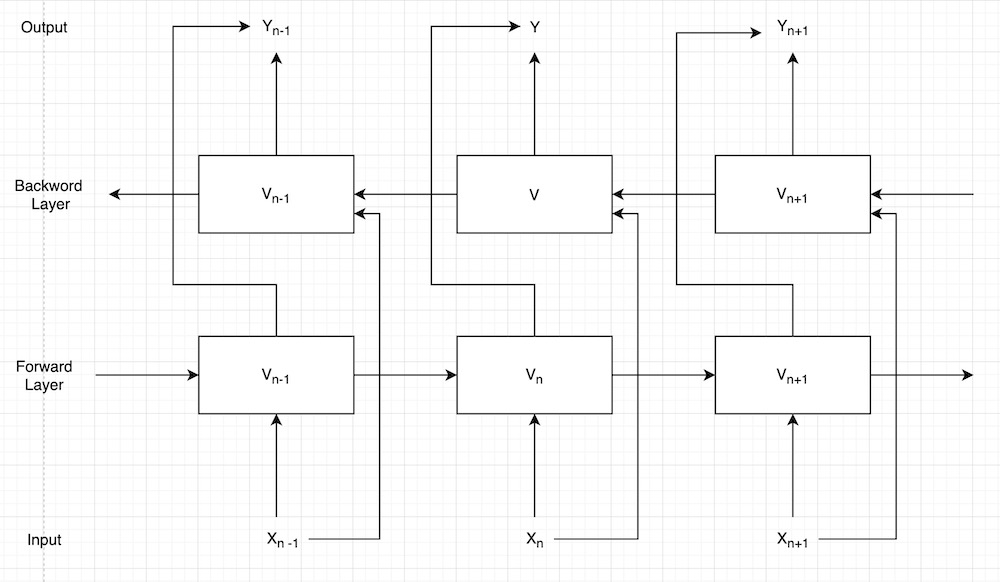

In [11]:
from IPython.display import Image
Image(filename='biLM.jpg')

In [16]:
import tensorflow as tf
import tensorflow_hub as hub

# Load the ELMo model from TensorFlow Hub
elmo = hub.load("https://tfhub.dev/google/elmo/3")

# Example sentence (no need to split the sentence into words)
sentences = [
    "I love to watch TV",
    "I am wearing a wrist watch"
]

# Convert the sentence to a tensor
input_tensor = tf.constant(sentences)

# Get the ELMo embeddings for the sentence
embeddings = elmo.signatures['default'](input_tensor)['elmo']

# The shape of the output embeddings will be [batch_size, sequence_length, embedding_dim]
# You can get the embedding for each word in the sentence
print("Shape of the embeddings:", embeddings.shape)

print("Word embeddings for the word 'WATCH' in the first sentence:")
print(embeddings[0][4].numpy())  # 4th index for the word "watch" in the first sentence

print("Word embeddings for the word 'WATCH' in the second sentence:")
print(embeddings[1][5].numpy())  # 5th index for the word "watch" in the second sentence

Shape of the embeddings: (2, 6, 1024)
Word embeddings for the word 'WATCH' in the first sentence:
[ 0.54308295 -0.3439697   0.24777155 ...  0.652064   -0.75163364
  0.6272552 ]
Word embeddings for the word 'WATCH' in the second sentence:
[-0.08213355  0.01050331 -0.01454124 ...  0.4870539  -0.5445795
  0.52623993]


### BERT（Bidirectional Encoder Representations from Transformers）
Encoder only bidirection tranformer archetecture

Pretraining : 1. Masked Language Model: guessing missing (masked) words, BERT adds a special layer on top of its learning system to make these guesses, focuses on missing words. 2. Next Sentence Prediction (NSP) : guessing if one sentence follows another

Fine-tuning : supervised learning on labeled data

In [19]:
from transformers import BertTokenizer

# Load pre-trained BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

# Input text
text = 'ChatGPT is a language model developed by OpenAI, based on the GPT (Generative Pre-trained Transformer) architecture. '

# Tokenize and encode the text
encoding = tokenizer.encode(text)

# Print the token IDs
print("Token IDs:", encoding)

# Convert token IDs back to tokens
tokens = tokenizer.convert_ids_to_tokens(encoding)

# Print the corresponding tokens
print("Tokens:", tokens)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Token IDs: [101, 24705, 1204, 17095, 1942, 1110, 170, 1846, 2235, 1872, 1118, 3353, 1592, 2240, 117, 1359, 1113, 1103, 15175, 1942, 113, 9066, 15306, 11689, 118, 3972, 13809, 23763, 114, 4220, 119, 102]
Tokens: ['[CLS]', 'Cha', '##t', '##GP', '##T', 'is', 'a', 'language', 'model', 'developed', 'by', 'Open', '##A', '##I', ',', 'based', 'on', 'the', 'GP', '##T', '(', 'Gene', '##rative', 'Pre', '-', 'trained', 'Trans', '##former', ')', 'architecture', '.', '[SEP]']
